# First Step: reading all the datasets, cleaning them, dealing with missing values, and merging all 4 datasets.

## reding the checkouts dataset:

In [173]:
import pandas as pd

In [174]:
checkouts = pd.read_csv('checkouts.csv')
checkouts.head()

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23


In [175]:
checkouts.isna().sum()

id                0
patron_id         0
library_id        0
date_checkout    65
date_returned    58
dtype: int64

### now we need to drop the rows where date_checkout and date_returned values are none, because the difference between these two, will create the target variable for us.

In [176]:
checkouts.dropna(inplace=True)

In [177]:
checkouts.dtypes

id               object
patron_id        object
library_id       object
date_checkout    object
date_returned    object
dtype: object

### now we need to change the type of date_returned and date_checkout to datetime, so we can calculate the difference between them:

In [178]:
checkouts['date_checkout'] = pd.to_datetime(checkouts['date_checkout'], errors='coerce', format='%Y-%m-%d')
checkouts['date_returned'] = pd.to_datetime(checkouts['date_returned'], errors='coerce', format='%Y-%m-%d')

### using .to_julian_date(), we can get the number of days between date_checkout and date_returned:

In [179]:
checkouts['numdays'] = pd.DatetimeIndex(pd.to_datetime(checkouts['date_returned'])).to_julian_date()- pd.DatetimeIndex(pd.to_datetime(checkouts['date_checkout'])).to_julian_date()

In [180]:
checkouts.head()

,id,patron_id,library_id,date_checkout,date_returned,numdays
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,-76.0
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100.0
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,-78505.0


### here we notice some negative numbers in 'numdays', there are also some very big numbers, which means that the dates were entered were not correct, so we need to remove those:

In [181]:
checkouts = checkouts[(checkouts['numdays']>0) & (checkouts['numdays']<365)]

### now I create my target variable, when numdays is greater that 28, the target will be 1, which means that it is a late return, otherwise the target is zero, which means that the return was not late:

In [182]:
import numpy as np
checkouts['late'] = np.where(checkouts['numdays'] > 28, 1, 0)

# Second step: reading and analyzing the customers dataset:

In [183]:
customers = pd.read_csv('customers.csv')

In [184]:
customers.head()

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,Portland,Oregon,97213.0,2009-09-10,female,High School,NaN
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,Portland,Oregon,97215.0,1956-12-15,female,College,Blue Collar
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,Portland,Oregon,97214.0,1960-12-18,male,College,Education & Health
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,Oregon,97217.0,2105-07-19,male,Graduate Degree,SALES
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NaN,Oregon,97218.0,1961-03-14,male,Graduate Degree,Blue Collar


### cleaning the customers dataset:

In [185]:
customers['city'].unique()

array(['Portland ', ' Portland', 'Portland', nan, 'Happy Valley',
       'Lake Oswego', 'Vancouver', 'Beaverton', 'PORTLAND', 'Gresham',
       'West Linn', 'Vancouver ', 'Tualatin', 'Oregon City', 'Damascus',
       'portland', 'Clackamas', ' Vancouver', 'Hillsboro', 'Lake  Oswego',
       'Lake OSWEGO', 'Happy  Valley', 'Lake   Oswego', 'VANCOUVER',
       'vancouver', 'Gladstone', 'BEAVERTON', 'HAPPY Valley', 'CLACKAMAS',
       'LAKE OSWEGO', 'Happy  Valley ', ' Beaverton', 'Happy Valley '],
      dtype=object)

### let's make all the cities in lowercase and remove the spaces between the name of each city, because there are some extra spaces in each city name:

In [186]:
customers['city']= customers['city'].str.lower().str.replace(" ","")

In [187]:
customers['state'].unique()

array(['Oregon', 'OREGON', 'Washington', nan, 'Oregon ', ' Oregon',
       ' Washington', 'oregon', 'Washington ', 'washington'], dtype=object)

### having city name, we will not need the state anymore. 

I changed the id to cust_id, so it will not be mistaken with library id and book id later. 
I also drop the id, state and name of each customer, cause they will not be needed:

In [188]:
customers['cust_id'] = customers['id']
customers.drop([ 'state', 'id','name'], axis=1, inplace = True)
customers.head()

,street_address,city,zipcode,birth_date,gender,education,occupation,cust_id
0,44 NE Meikle Pl,portland,97213.0,2009-09-10,female,High School,NaN,df83ec2d0d409395c0d8c2690cfa8b67
1,7511 SE Harrison St,portland,97215.0,1956-12-15,female,College,Blue Collar,6aec7ab2ea0d67161dac39e5dcabd857
2,1404 SE Pine St,portland,97214.0,1960-12-18,male,College,Education & Health,0c54340672f510fdb9d2f30595c1ab53
3,12271 N Westshore Dr,portland,97217.0,2105-07-19,male,Graduate Degree,SALES,f0d9ce833ddc1f73c1e0b55bdebf012e
4,5321 NE Skyport Way,NaN,97218.0,1961-03-14,male,Graduate Degree,Blue Collar,3720379163f6b46944db6c98c0485bfd


### Now I merge the customer dataset with checkout dataset, and drop the patron_id, because we already have the customer_id

In [189]:
cust_check = pd.merge(left=checkouts, right=customers, left_on='patron_id', right_on='cust_id')
cust_check.drop(['patron_id'], axis=1, inplace= True)
cust_check.head()

,id,library_id,date_checkout,date_returned,numdays,late,street_address,city,zipcode,birth_date,gender,education,occupation,cust_id
0,HUX-y4oXl04C,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,0,4942 SE 28th Ave,portland,97202.0,1965-01-24,female,graduate DEGREE,Tech,8d3f63e1deed89d7ba1bf6a4eb101373
1,TQpFnkku2poC,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0,1,2821 NE Klickitat St,portland,97212.0,1963-11-04,male,Graduate Degree,Education & Health,4ae202f8de762591734705e0079d76df
2,OQ6sDwAAQBAJ,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100.0,1,1720 N Shaver St,portland,97227.0,2119-02-10,male,Graduate DEGREE,Sales,f9372de3c8ea501601aa3fb59ec0f524
3,CW-7tHAaVR0C,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04,25.0,0,6614 N Wilbur Ave,portland,97217.0,1984-07-27,male,Graduate Degree,Education & Health,dd9f34e9d65126a2b02003d8ac60aaa4
4,t1e3BWziAc8C,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14,21.0,0,2617 NE 33rd Ave,portland,97212.0,1976-09-24,male,High School,Business & FINANCE,3b85b2c7b424618f533329018e9a11d5


# third step: reading and cleaning the libraries dataset:

In [190]:
libraries = pd.read_csv('libraries.csv')
libraries

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,or,-97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202
5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OR,-97206
6,zzw-224@5xc-jwv-2rk,Multnomah County Library Central,801 SW 10th Ave,Portland,NaN,97205
7,zzw-223@5xc-jv7-ct9,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204
8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OR,97214
9,zzw-222@5xc-knn-c5z,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,NaN


### cleaning the postal_code variable:

In [191]:
libraries['postal_code'] = libraries['postal_code'].str.replace("#","")\
                                                   .str.replace('_',"")\
                                                   .str.replace('-',"")\
                                                   .str.replace(" ","")

### filling out the missing values of postal code, I googled and found the correct postal code

In [192]:
libraries.loc[1,'postal_code']= str(97210)
libraries.loc[9,'postal_code'] = str(97206)
libraries.loc[12, 'postal_code'] = str(97212)
libraries

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,97210
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,or,97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202
5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OR,97206
6,zzw-224@5xc-jwv-2rk,Multnomah County Library Central,801 SW 10th Ave,Portland,NaN,97205
7,zzw-223@5xc-jv7-ct9,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204
8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OR,97214
9,zzw-222@5xc-knn-c5z,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,97206


### The city, and region seems to be the same for all the libraries, I also will not need the name of each library, the lib_id will do that for me, so I will drop them. I change the id to lib_id:

In [193]:
libraries.rename(columns={'id': 'lib_id', 'street_address': 'lib_street_address'}, inplace= True)
libraries.drop([ 'city', 'region', 'name'], axis=1, inplace = True)
libraries

,lib_id,lib_street_address,postal_code
0,226-222@5xc-kc4-fpv,10723 SW capitol Hwy,97219
1,23v-222@5xc-jv7-v4v,2300 NW Thurman St,97210
2,222-222@5xc-jvf-skf,7510 N Charleston Ave,97203
3,227-222@5xc-jww-btv,1525 SW Sunset blvd,97239
4,22d-222@5xc-kcy-8sq,7860 SE 13th AVE,97202
5,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206
6,zzw-224@5xc-jwv-2rk,801 SW 10th Ave,97205
7,zzw-223@5xc-jv7-ct9,522 SW 5th Ave,97204
8,226-222@5xc-jxj-7yv,1038 SE CESAR E CHAVEZ blvd,97214
9,zzw-222@5xc-knn-c5z,7905 SE Holgate Blvd,97206


In [194]:
libraries.isna().sum()

lib_id                0
lib_street_address    0
postal_code           0
dtype: int64

### Now that the libraries dataset is clean, we can merge it with the cust_check dataset.

In [195]:
cust_check_lib = pd.merge(left=cust_check, right=libraries, left_on='library_id', right_on='lib_id')
cust_check_lib.head()

,id,library_id,date_checkout,date_returned,numdays,late,street_address,city,zipcode,birth_date,gender,education,occupation,cust_id,lib_id,lib_street_address,postal_code
0,HUX-y4oXl04C,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,0,4942 SE 28th Ave,portland,97202.0,1965-01-24,female,graduate DEGREE,Tech,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206
1,MOewp6bCFfgC,223-222@5xc-jxr-tgk,2018-04-30,2018-08-30,122.0,1,636 SE 154th Ave,portland,97233.0,1803-04-20,male,College,Sales,7fd53f66a6d4cd12875487af4008bb08,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206
2,iAzrAAAAIAAJ,223-222@5xc-jxr-tgk,2018-07-07,2018-07-12,5.0,0,7039 SE 35th Ave,portland,97202.0,2004-03-21,male,High School,Tech,ceb72a116d42d8d441e234f80ecf8bb9,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206
3,ygoFAAAAQAAJ,223-222@5xc-jxr-tgk,2018-02-19,2018-03-06,15.0,0,1125 SE 60th Ave,portland,97215.0,1806-02-04,male,High School,Admin & Support,7a1f47edd69d69da4c5f95a6a95f75ee,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206
4,eBcFQ3DUcQEC,223-222@5xc-jxr-tgk,2018-06-29,2018-07-09,10.0,0,3755 SE Woodstock Blvd,portland,97202.0,1951-12-21,male,High School,Education & Health,55ed00061e3e9092b8d390ff157b1166,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206


# Now let's read the books dataset and do the cleaning on that:

In [196]:
books = pd.read_csv('books.csv')
books.head()

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757


### let's change the publishedDate to datetime variable:

In [197]:
books['publishedDate'] = pd.to_datetime(books['publishedDate'], errors='coerce', format='%Y-%m-%d')

In [198]:
books.isna().sum()

id                 0
title              0
authors           67
publisher        146
publishedDate      2
categories        39
price              2
pages              0
dtype: int64

In [199]:
books['publishedDate'].fillna(pd.Timestamp("20210101"), inplace= True)

### Calculating the age of the book:

In [200]:
books['year_published'] = books['publishedDate'].dt.year

In [201]:
books['book_age'] = books['year_published'].apply(lambda x: 2021 - x)

In [202]:
books.head()

,id,title,authors,publisher,publishedDate,categories,price,pages,year_published,book_age
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,2013,8
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913-01-01,['Advertising'],469.99,654,1913,108
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973-01-01,['Advertising'],372.0,784,1973,48
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894-01-01,['Advertising'],240.99USD,559,1894,127
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944-01-01,['Government publications'],539.0,757,1944,77


### we are not going to need year_published and publishedDate, so I drop them here:

In [203]:
books = books.drop(['year_published', 'publishedDate'], axis=1)

### cleaning the pages and price variables:

In [204]:
books['pages'] = books['pages'].str.replace("#","").str.replace("^","").str.replace("|","").str.replace("*","").astype(str).astype(int)

<ipython-input-204-214119f5c61b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  books['pages'] = books['pages'].str.replace("#","").str.replace("^","").str.replace("|","").str.replace("*","").astype(str).astype(int)


In [205]:
books['price'] = books['price'].str.replace("|","").str.replace("*","").str.replace("$","").str.replace("USD","").astype(float)

<ipython-input-205-7bab91bedd01>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  books['price'] = books['price'].str.replace("|","").str.replace("*","").str.replace("$","").str.replace("USD","").astype(float)


### now let's merge books with the rest of the data:
#### Joined dataframe will have all 4 datasets in it:

In [206]:
joined = pd.merge(left=cust_check_lib, right=books, left_on='id', right_on='id')
joined.head()

,id,library_id,date_checkout,date_returned,numdays,late,street_address,city,zipcode,birth_date,...,lib_id,lib_street_address,postal_code,title,authors,publisher,categories,price,pages,book_age
0,HUX-y4oXl04C,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,0,4942 SE 28th Ave,portland,97202.0,1965-01-24,...,223-222@5xc-jxr-tgk,6008 se 49TH AVE,97206,Indian Financial System 5E,['Khan'],Tata McGraw-Hill Education,NaN,416.99,752,15
1,HUX-y4oXl04C,23v-222@5xc-jv7-v4v,2018-08-06,2018-10-02,57.0,1,5054 SW 26th Pl,portland,97239.0,1981-11-10,...,23v-222@5xc-jv7-v4v,2300 NW Thurman St,97210,Indian Financial System 5E,['Khan'],Tata McGraw-Hill Education,NaN,416.99,752,15
2,HUX-y4oXl04C,222-222@5xc-jv5-nt9,2018-02-16,2018-03-03,15.0,0,4241 NE Holman St,portland,97218.0,1977-06-09,...,222-222@5xc-jv5-nt9,512 N Killingsworth St,97217,Indian Financial System 5E,['Khan'],Tata McGraw-Hill Education,NaN,416.99,752,15
3,HUX-y4oXl04C,zzw-222@5xc-knn-c5z,2018-11-06,2018-12-03,27.0,0,7450 SE Overland St,portland,97222.0,1964-10-15,...,zzw-222@5xc-knn-c5z,7905 SE Holgate Blvd,97206,Indian Financial System 5E,['Khan'],Tata McGraw-Hill Education,NaN,416.99,752,15
4,HUX-y4oXl04C,226-222@5xc-jxj-7yv,2018-08-19,2018-08-24,5.0,0,4106 NE 69th Ave,portland,97218.0,1990-10-06,...,226-222@5xc-jxj-7yv,1038 SE CESAR E CHAVEZ blvd,97214,Indian Financial System 5E,['Khan'],Tata McGraw-Hill Education,NaN,416.99,752,15


### Now I calculate each customer's age:

In [207]:
joined['age'] =  pd.to_datetime(joined['birth_date'], errors='coerce', format='%Y-%m-%d').dt.year 

In [208]:
joined['cust_age'] = joined['age'].apply(lambda x: 2021 - x)

### And then remove the customers who have age less than 5 and more than 100, cause that might be a corrupted data:

In [209]:
joined = joined[(joined['cust_age']<100) & (joined['cust_age']>5)]

### I will also sort the joined dataset by date_checkout variable, because we cannot use train_test_split here, cause it is a timeseries and we need to predict for the future:

In [210]:
joined.sort_values('date_checkout', ignore_index = True, inplace = True)

### Let's also see which libraries have the most late returns:

In [212]:
x = joined.groupby('library_id')['late'].sum()
x

library_id
222-222@5xc-jv5-nt9    7
222-222@5xc-jvf-skf    3
222-222@5xc-jxp-rp9    9
222-222@5xc-kkw-bzf    6
223-222@5xc-jxr-tgk    7
224-222@5xc-jw2-t9z    3
225-222@5xc-jtz-hkf    8
226-222@5xc-jxj-7yv    5
226-222@5xc-kc4-fpv    4
227-222@5xc-jww-btv    6
228-222@5xc-jtz-hwk    9
22c-222@5xc-jwj-pvz    6
22d-222@5xc-kcy-8sq    8
23v-222@5xc-jv7-v4v    6
zzw-222@5xc-jv4-789    8
zzw-222@5xc-knn-c5z    8
zzw-223@5xc-jv7-ct9    7
zzw-224@5xc-jwv-2rk    7
Name: late, dtype: int64

<AxesSubplot:xlabel='library_id'>

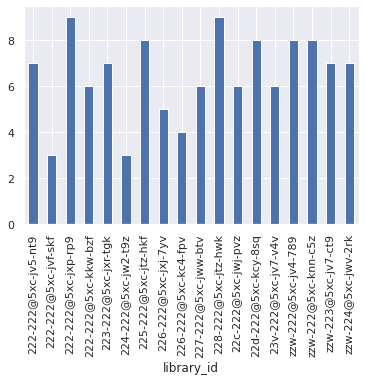

In [213]:
x.plot(kind= 'bar')

### Cleaning the gender variable:

In [214]:
joined['gender'].unique()

array(['female', 'male', 'female ', nan, 'male ', ' male', 'FEMALE',
       'MALE', ' female'], dtype=object)

In [215]:
joined['gender']= joined['gender'].str.lower().replace(" ","").str.strip()

In [216]:
joined['gender'].unique()

array(['female', 'male', nan], dtype=object)

### Now let's see if gender is playing a role in the late returns or not, using a bar plot again:

In [217]:
counts = joined.groupby(['library_id', 'gender']).late.sum().unstack()
print(counts)

gender               female  male
library_id                       
222-222@5xc-jv5-nt9       3     4
222-222@5xc-jvf-skf       2     1
222-222@5xc-jxp-rp9       7     2
222-222@5xc-kkw-bzf       3     3
223-222@5xc-jxr-tgk       3     4
224-222@5xc-jw2-t9z       1     2
225-222@5xc-jtz-hkf       5     3
226-222@5xc-jxj-7yv       2     3
226-222@5xc-kc4-fpv       2     2
227-222@5xc-jww-btv       3     3
228-222@5xc-jtz-hwk       5     4
22c-222@5xc-jwj-pvz       1     5
22d-222@5xc-kcy-8sq       2     6
23v-222@5xc-jv7-v4v       3     3
zzw-222@5xc-jv4-789       3     5
zzw-222@5xc-knn-c5z       5     2
zzw-223@5xc-jv7-ct9       4     3
zzw-224@5xc-jwv-2rk       0     7


<AxesSubplot:xlabel='library_id'>

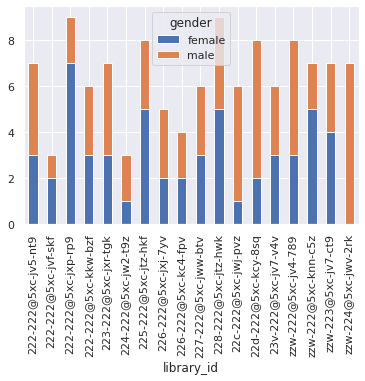

In [218]:
counts.plot(kind='bar', stacked=True)

### Let's see If the target data is balanced or not:

In [219]:
len(joined[joined['late']==1])

117

In [220]:
len(joined[joined['late']==0])

1094

/opt/conda/envs/data3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


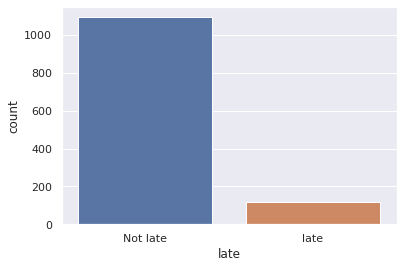

In [221]:
# visualize the target variable
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
g = sns.countplot(joined['late'])
g.set_xticklabels(['Not late','late'])
plt.show()

### According to the plot above, we can see that the target data is not balanced, so I need to over sample the data. I could also use class_weight as the model's parameter to fix the imbalanced target data. But now let's try oversampling:

In [222]:
class_0 = joined[joined['late'] == 0]
class_1 = joined[joined['late'] == 1]

class_count_0, class_count_1 = joined['late'].value_counts()

<AxesSubplot:title={'center':'count (target)'}>

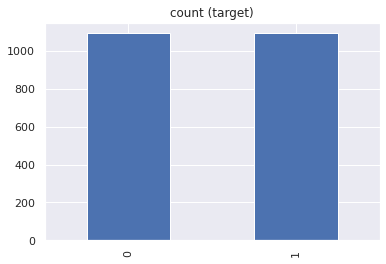

In [223]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)
test_over['late'].value_counts().plot(kind='bar', title='count (target)')

### The test_over dataset has a balanced target data.

### Now let's extract the day of the week that each customer checked_out the book:

In [225]:
test_over['weekday'] = test_over['date_checkout'].dt.dayofweek

### Also let's extract the month each customer checked out a book:

In [226]:
test_over.reset_index(drop = True, inplace = True)
test_over.sort_values('date_checkout', ignore_index = True, inplace = True)
test_over['month_checkout'] = test_over['date_checkout'].dt.month

### fixing the categories variable:

In [227]:
test_over['categories']

0       ['Fire engines']
1       ['Fire engines']
2       ['Fire engines']
3       ['Fire engines']
4       ['Fire engines']
              ...       
2183         ['Science']
2184         ['Science']
2185         ['Science']
2186         ['Science']
2187         ['Medical']
Name: categories, Length: 2188, dtype: object

In [228]:
for i in range(len(test_over['categories'])):
    if test_over['categories'][i] is not np.nan:
        test_over['categories'][i] = test_over['categories'][i][2:-2]
    
test_over['categories']

<ipython-input-228-f30fb9c8b001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_over['categories'][i] = test_over['categories'][i][2:-2]


0       Fire engines
1       Fire engines
2       Fire engines
3       Fire engines
4       Fire engines
            ...     
2183         Science
2184         Science
2185         Science
2186         Science
2187         Medical
Name: categories, Length: 2188, dtype: object

### filling out the missing values:

In [229]:
test_over['price'].fillna(0, inplace= True)

In [230]:
test_over.fillna('nan', inplace= True)

In [231]:
test_over.isna().sum()

id                    0
library_id            0
date_checkout         0
date_returned         0
numdays               0
late                  0
street_address        0
city                  0
zipcode               0
birth_date            0
gender                0
education             0
occupation            0
cust_id               0
lib_id                0
lib_street_address    0
postal_code           0
title                 0
authors               0
publisher             0
categories            0
price                 0
pages                 0
book_age              0
age                   0
cust_age              0
weekday               0
month_checkout        0
dtype: int64

## changing the id to book_id for more clarification in the dataset:

In [232]:
test_over.rename(columns={'id': 'book_id'}, inplace= True)
test_over.columns

Index(['book_id', 'library_id', 'date_checkout', 'date_returned', 'numdays',
       'late', 'street_address', 'city', 'zipcode', 'birth_date', 'gender',
       'education', 'occupation', 'cust_id', 'lib_id', 'lib_street_address',
       'postal_code', 'title', 'authors', 'publisher', 'categories', 'price',
       'pages', 'book_age', 'age', 'cust_age', 'weekday', 'month_checkout'],
      dtype='object')

### Creating the X and y for our model:

In [233]:
features_to_use = ['library_id', 'book_id', 'city',
                   'zipcode', 'gender', 'education', 'occupation',
                   'month_checkout', 'cust_age',
                   'categories','pages', 'weekday', 'price', 'postal_code', 'authors', 'publisher', 'book_age']

X = test_over[features_to_use]
y = test_over['late']

### Because most of the features I am using are categorical feature, I am using oneHotEncoder to encode the categorical variables.
### it will encode the columns_to_encode variables and the keyword "passThrough" will pass the rest of the features_to_use as they are:

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')
columns_to_encode = ['library_id','zipcode', 'gender', 'education', 'occupation', 'month_checkout', 'categories',
                    'weekday','book_id', 'postal_code', 'authors', 'publisher', 'city']


ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')

ohe_final.fit(X);

In [235]:
X_transformed = ohe_final.transform(X)
print('Shape of transformed data matrix: ', X_transformed.shape)

Shape of transformed data matrix:  (2188, 870)


### Because we have date in the dataset, we cannot use train_test_split to create X_train, y_train, X_test, and y_test. We need to use time series Split for this:

In [236]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier

tscv = TimeSeriesSplit(n_splits=3)
#print(tscv.split(X))  
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### First I try logistic regression:

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=10000, random_state=1024)

lr_pipe = Pipeline([('ohe', ohe_final),
                   ('scaler', StandardScaler()),
                    ('lr', lr)])

lr_pipe.fit(X_train, y_train);

In [238]:
y_pred = lr_pipe.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

In [239]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

### Let's look at the confusion matrix:

In [240]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

,class 0 pred,class 1 pred
class 0 actual,235,32
class 1 actual,169,111


### As we can see here, it is not doing a good job on predicting class 1. Let's look at the precision, recall, accuracy and the area under the ROC curve:

In [241]:
from sklearn import metrics

def model_evaluation(model, X, y_true):
    y_pred = model.predict(X)
    scores = {}
    scores['accuracy'] = round(metrics.accuracy_score(y_true, y_pred), 4)
    scores['precision'] = round(metrics.precision_score(y_true, y_pred), 4)
    scores['recall'] = round(metrics.recall_score(y_true, y_pred), 4)
    probs = model.predict_proba(X).T[1]
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_true, probs)
    scores['area under precision-recall curve'] = round(metrics.auc(recalls, precisions), 4)
    return scores

def print_model_evaluation(model_name, scores):
    print('{} evaluation \n'.format(model_name))
    for metric, score in scores.items():
        print('Test {}: {}'.format(metric, score))

In [242]:
lr_pipe_score = model_evaluation(lr_pipe, X_test, y_test)
print_model_evaluation('Logistic regression', lr_pipe_score)

Logistic regression evaluation 

Test accuracy: 0.6325
Test precision: 0.7762
Test recall: 0.3964
Test area under precision-recall curve: 0.7836


### Recall and accuracy is not good so far. Let's now try RandomForestClassifier model and see what results we get from that:

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_pipe = Pipeline([('ohe', ohe_final),
                    ('rf', RandomForestClassifier(n_estimators=512, random_state=1024
                                                 , max_depth=4))])

# rf_gs = GridSearchCV(rf_pipe, 
#                      cv=5, 
#                      param_grid={'rf__max_depth': range(3, 10)}
#                     )


rf_pipe.fit(X_train, y_train)


rf_pipe_scores = model_evaluation(rf_pipe, X_test, y_test)
print_model_evaluation('Random forest', rf_pipe_scores)

Random forest evaluation 

Test accuracy: 0.702
Test precision: 0.7773
Test recall: 0.5857
Test area under precision-recall curve: 0.8314


### Still recall is not good here, however we can see a much better accuracy and precision . Let's try GradientBoostingClassifier:

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, max_depth=4, random_state=128)
gb_pipe = Pipeline([('ohe', ohe_final),
                    ('gb', gb)])


gb_pipe.fit(X_train, y_train)

gb_pipe_scores = model_evaluation(gb_pipe, X_test, y_test)
print_model_evaluation('Gradient Boosting', gb_pipe_scores)

Gradient Boosting evaluation 

Test accuracy: 0.7751
Test precision: 0.7679
Test recall: 0.8036
Test area under precision-recall curve: 0.806


### finding out the important features of the GradientBoostingClassifier:
##### I got the code from https://katstam.com/regression-feature_importance/

In [245]:
onehot_columns = list(gb_pipe.named_steps['ohe']\
                       .named_transformers_[transformer_name]\
                       .get_feature_names(input_features=columns_to_encode))

In [246]:
numeric_features= [item for item in features_to_use if item not in columns_to_encode]
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)
numeric_features_list

['cust_age',
 'pages',
 'price',
 'book_age',
 'library_id_222-222@5xc-jv5-nt9',
 'library_id_222-222@5xc-jvf-skf',
 'library_id_222-222@5xc-jxp-rp9',
 'library_id_222-222@5xc-kkw-bzf',
 'library_id_223-222@5xc-jxr-tgk',
 'library_id_224-222@5xc-jw2-t9z',
 'library_id_225-222@5xc-jtz-hkf',
 'library_id_226-222@5xc-jxj-7yv',
 'library_id_226-222@5xc-kc4-fpv',
 'library_id_227-222@5xc-jww-btv',
 'library_id_228-222@5xc-jtz-hwk',
 'library_id_22c-222@5xc-jwj-pvz',
 'library_id_22d-222@5xc-kcy-8sq',
 'library_id_23v-222@5xc-jv7-v4v',
 'library_id_zzw-222@5xc-jv4-789',
 'library_id_zzw-222@5xc-knn-c5z',
 'library_id_zzw-223@5xc-jv7-ct9',
 'library_id_zzw-224@5xc-jwv-2rk',
 'zipcode_ 97086.0',
 'zipcode_ 97202.0',
 'zipcode_ 97203.0',
 'zipcode_ 97206.0',
 'zipcode_ 97210.0',
 'zipcode_ 97212.0',
 'zipcode_ 97214.0',
 'zipcode_ 97218.0',
 'zipcode_#97034.0',
 'zipcode_#97201.0',
 'zipcode_#97202.0',
 'zipcode_#97211.0',
 'zipcode_#97212.0',
 'zipcode_#97213.0',
 'zipcode_#97217.0',
 'zipcode

In [247]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [248]:
import eli5
eli5.explain_weights(gb_pipe.named_steps['gb'], top=50, feature_names=numeric_features_list, 
                     feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.4405 ± 0.1496,city_tualatin
0.0861 ± 0.0829,city_happyvalley
0.0508 ± 0.0892,city_vancouver
0.0505 ± 0.0605,zipcode_97233.0
0.0462 ± 0.1076,city_portland
0.0347 ± 0.0590,month_checkout_3
0.0345 ± 0.0593,occupation_Education & Health
0.0232 ± 0.0761,zipcode_97236.0
0.0229 ± 0.0490,weekday_2
0.0184 ± 0.0596,"authors_['Flemming Hansen', 'Sverre Riis Christensen', 'Steen Lundsteen']"


### looking at the table above, we can see what features are more important in our model: 
#### city and customer zipcode is much more important than other features, other features such as library's postal code, book's category, and month and week day of checkout are also somehow important in this model.

In [249]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### GradientBoostingClassifier model is giving the best results so far. Let's also try XGBClassifier:

In [250]:
from xgboost import XGBClassifier




params={
    'n_estimators':150,
    'objective': 'binary:logistic',
    'learning_rate': 0.02,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':4,
    'max_depth': 4,
    'seed':1024,
    }

xgb = XGBClassifier(**params)


xgb_pipe = Pipeline([('ohe', ohe_final),
                    ('xgb', xgb)])


xgb_pipe.fit(X_train, y_train)

xgb_pipe_scores = model_evaluation(xgb_pipe, X_test, y_test)
print_model_evaluation('xgb', xgb_pipe_scores)


/opt/conda/envs/data3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb evaluation 

Test accuracy: 0.7331
Test precision: 0.7991
Test recall: 0.6393
Test area under precision-recall curve: 0.8396


### XGBClassifier is also not doing bad, but GradientBoostingClassifier has given the best results so far. Let's plot all the ROC curves and see the difference there:

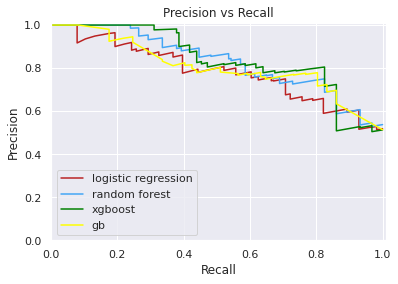

In [251]:
import matplotlib.pyplot as plt

precisions_lr, recalls_lr, thresholds = metrics.precision_recall_curve(y_test,
                                                                 lr_pipe.predict_proba(X_test).T[1])


precisions_rf, recalls_rf, thresholds = metrics.precision_recall_curve(y_test,
                                                                 rf_pipe.predict_proba(X_test).T[1])


precisions_xgb, recalls_xgb, thresholds = metrics.precision_recall_curve(y_test,
                                                                 xgb_pipe.predict_proba(X_test).T[1])


precisions_gb, recalls_gb, thresholds = metrics.precision_recall_curve(y_test,
                                                                 gb_pipe.predict_proba(X_test).T[1])




plt.plot(recalls_lr, precisions_lr, c='#ba2121ff', label='logistic regression')
plt.plot(recalls_rf, precisions_rf, c='#42a5f5ff', label='random forest')
plt.plot(recalls_xgb, precisions_xgb, c='#008000', label='xgboost')
plt.plot(recalls_gb, precisions_gb, c='#ff0', label='gb')

plt.xlim([0., 1.01])
plt.ylim([0., 1.01])
plt.xlabel('Recall') 
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.legend();

### How would you present your findings to them to get buy-in? 

#### One of the critical concerns of libraries is to have requested books available to better serve customers. Otherwise, customers would be disappointed. As shown in figure xxx, all the 18 libraries have some late returns which would result in unavailability of certain books for other customers. Using advanced data analysis approaches, we built a model that predicts the likelihood of a late return of any book at checkout time. In that case, you would know which return would be late, and be well-prepared to manage the situation.

### What would you recommend the library do to mitigate the risks you find? 

#### to answer this question, let's look at some plots below:

In [252]:
categ = joined.groupby('categories')['late'].sum().sort_values()[-10:]
#categ

<AxesSubplot:xlabel='categories'>

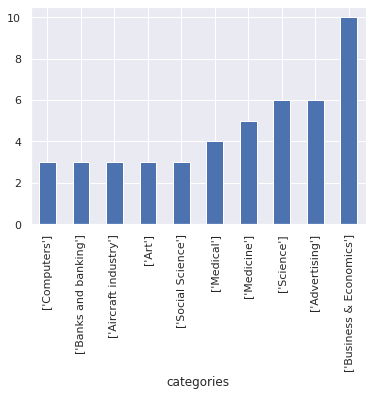

In [253]:
categ.plot(kind= 'bar', stacked= True)

In [255]:
city = joined.groupby('city')['late'].sum().sort_values()[-10:]

<AxesSubplot:xlabel='city'>

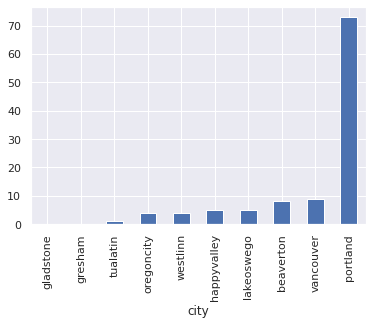

In [256]:
city.plot(kind= 'bar', stacked= True)

In [257]:
joined['month_checkout'] = joined['date_checkout'].dt.month

In [258]:
month_checkout = joined.groupby('month_checkout')['late'].sum()

<AxesSubplot:xlabel='month_checkout'>

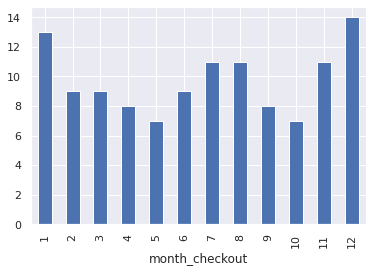

In [259]:
month_checkout.plot(kind= 'bar', stacked= True)

In [260]:
joined['weekday'] = joined['date_checkout'].dt.dayofweek
week_day = joined.groupby('weekday')['late'].sum()

<AxesSubplot:xlabel='weekday'>

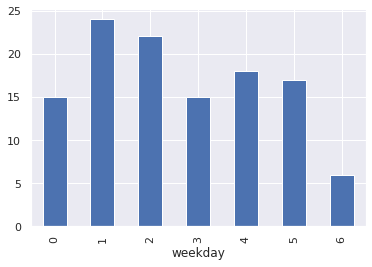

In [261]:
week_day.plot(kind= 'bar', stacked= True)

In [171]:
occ = joined.groupby('occupation')['late'].sum().sort_values()[-10:]

<AxesSubplot:xlabel='occupation'>

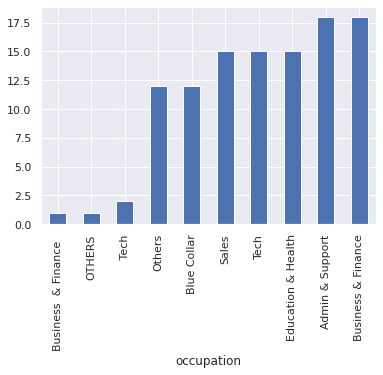

In [172]:
occ.plot(kind= 'bar', stacked= True)

### As we saw in the plots above:
* we can see that some categories are more likely to be returned late. Such as bussines and economics, advertising, etc. 
    * I recommend the library to have more number of these books in their inventory.
* People located in portland are more likely to return their books late. 
    * For this, we can create a reward program, that monitors the customers who returned their books on time, and reward them(e.g., give them a free book after 10 on time returns, and having no late return in their history.)
* We can also notice that there are more late returns in December and January, which makes sense, because people are traveling during the holidays.
    * For this, we can increase the late fee for these two months. 